# Case Study - Bike Sharing

# **Context:**

Bike-sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, the user is able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousand bicycles. Today, there exists a great interest in these systems due to their important role in traffic, environmental, and health issues.


# **Problem Statement:**
'Travel Along' is a new bike-sharing company and wants to expand its customer count and provide better services at a reasonable cost. They have conducted several surveys and collated the data about weather, weekends, holidays, etc. from the past 2 years.

As a recently hired data scientist at 'Travel Along', you have been asked to analyze the patterns in the data and figure out the key areas which can help the organization to grow and manage the customer demands. Further, you need to use this information to predict the count of bikes shared so that the company can take prior decisions for surge hours.

# **Objective:**

- What are the different factors which affect the target variable? What business recommendations can we give based on the analysis?
- How can we use different ensemble techniques - Bagging, Boosting, and Stacking to build a model to predict the count of bikes rented?

# **Data Description:**

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday then 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max). The “feel like” temperature relies on environmental data including the ambient air temperature, relative humidity, and wind speed to determine how weather conditions feel to bare skin.
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [ ]:
Look for dependencies
Make expectations
Think of corelations

## Index

- <a href = #link1>Overview of the dataset </a>


- <a href = #link2>EDA</a> 


- <a href = #link3>Split the dataset</a>


- <a href = #link4>Decision Tree Model </a> 


- <a href = #link5>Random Forest Model</a>


- <a href = #link6>Boosting Models</a>


- <a href = #link7>Stacking Model</a>


- <a href = #link8>Business Recommendations</a>

## <a id = "link1"></a> Overview of the dataset 

**Let's start by importing libraries we need.**

In [3]:
#pip install xgboost

# https://brew.sh
# below codes in terminal:
# /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
# brew install libomp

     |████████████████████████████████| 1.2 MB 3.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [33]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split


In [3]:
#Loading dataset
data=pd.read_csv("hour.csv")

**View the first 5 rows of the dataset.**

In [4]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Check data types and number of non-null values for each column.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- We can see that there are total 17 columns and 17,379 number of rows in the dataset.
- All columns' data type is either integer or float except one column - 'dteday' which is of object type.
- The number of non-null value of each column is equal to number of total rows in the dataset i.e. no null value. We can further confirm this using `isna()` method.**

In [6]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no missing values in the data.

**Summary of the dataset**

In [7]:
# Summary of continuous columns
data[['temp','atemp','hum','windspeed','cnt']].describe().T

,count,mean,std,min,25%,50%,75%,max
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000


- Mean and median value of temperature is approx 0.50
- Mean and median value for 'atemp' is approx 0.47 and 0.48 respectively
- Mean and median value for 'hum' is approx 0.627 and 0.63 respectively
- Wind speed has some extreme values at the right end
- Target variable seems to have skewed distribution as higher values are on the right. We will explore this further.

**Number of unique values in each column**

In [8]:
data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

- We can drop 'instant' column as it is an ID variable and will not add value to the model.
- We can drop 'dteday' column as it just contains dates of 731 days i.e. 2 years. This will not add value to the model.

In [9]:
#Dropping two columns from the dataframe
data.drop(columns=['instant','dteday'], inplace=True)

**Number of observations in each category**

In [10]:
cat_cols=['season','yr','holiday','workingday','weathersit']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
------------------------------
1    8734
0    8645
Name: yr, dtype: int64
------------------------------
0    16879
1      500
Name: holiday, dtype: int64
------------------------------
1    11865
0     5514
Name: workingday, dtype: int64
------------------------------
1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64
------------------------------


- Number of observations from year 0 i.e. 2011 is slightly more than number of observations from year 1 i.e. 2012.
- As expected, number of non-holidays and working days are much higher than number of holidays and non-working days respectively.
- We have only 3 observations where weathersit=4 and most common is 1 i.e. clear or partly cloudy.

## <a id = "link2"></a> EDA

### Univariate analysis

In [11]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

**Observations on temperature**

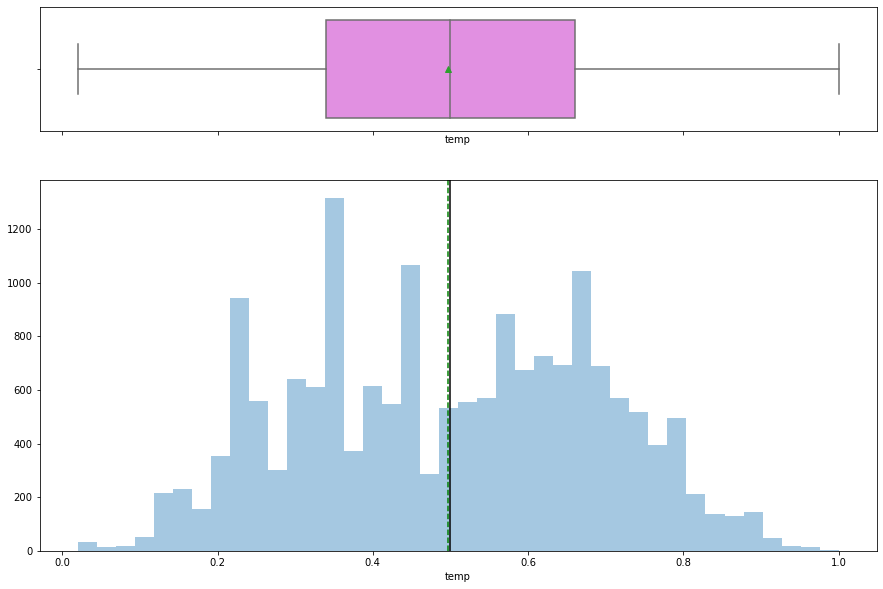

In [12]:
histogram_boxplot(data['temp'])

- Temperature has an approx symmetric distribution with mean and median equal to 0.5
- As evident from the boxplot, there are no outliers in the distribution for this variable

**Observations on 'feel like temperature'**

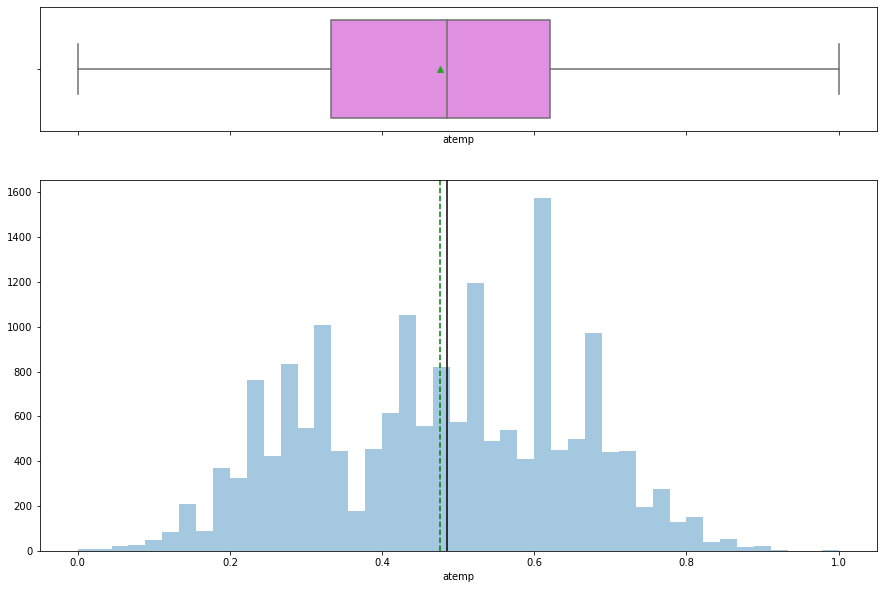

In [13]:
histogram_boxplot(data['atemp'])

- Same as temperature, the distribution for feel like temperature is also symmetrically distributed
- There are no outliers in the distribution of this variables

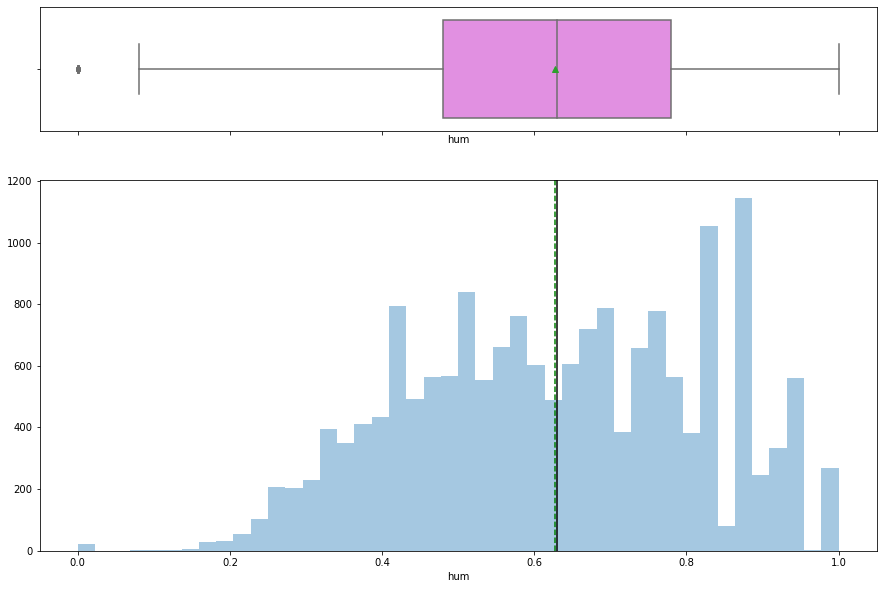

In [14]:
histogram_boxplot(data['hum'])

- Most of values are concentrated in the middle i.e. 0.4 to 0.8
- Humidity with value equal to 0 is an outlier
- The distribution is approx normally distributed with mean and median equal to 0.63

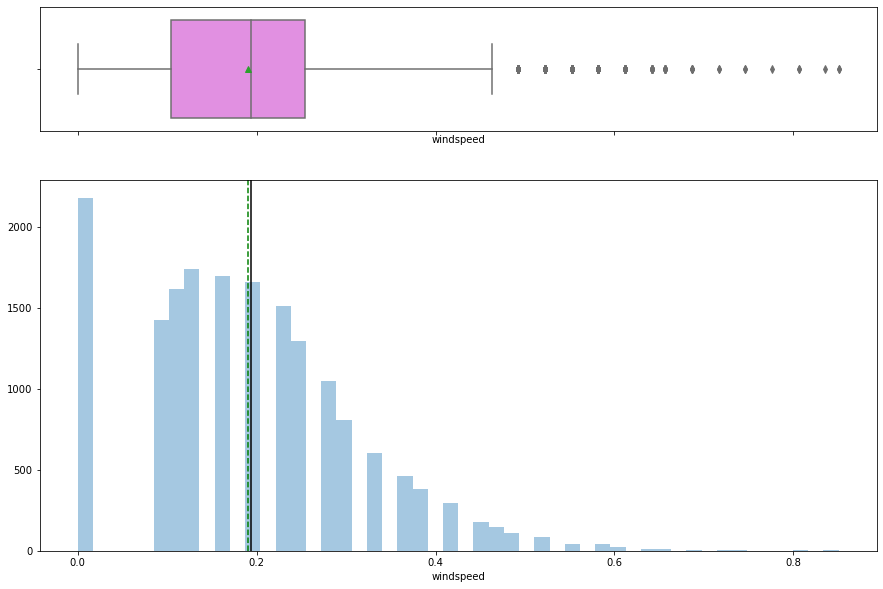

In [15]:
histogram_boxplot(data['windspeed'])

- Wind speed has a right skewed distribution and 0 has the highest count among all observations
- Distribution is not symmetric but mean and median are approx equal with value equal to 0.19
- There are many outliers in this variable

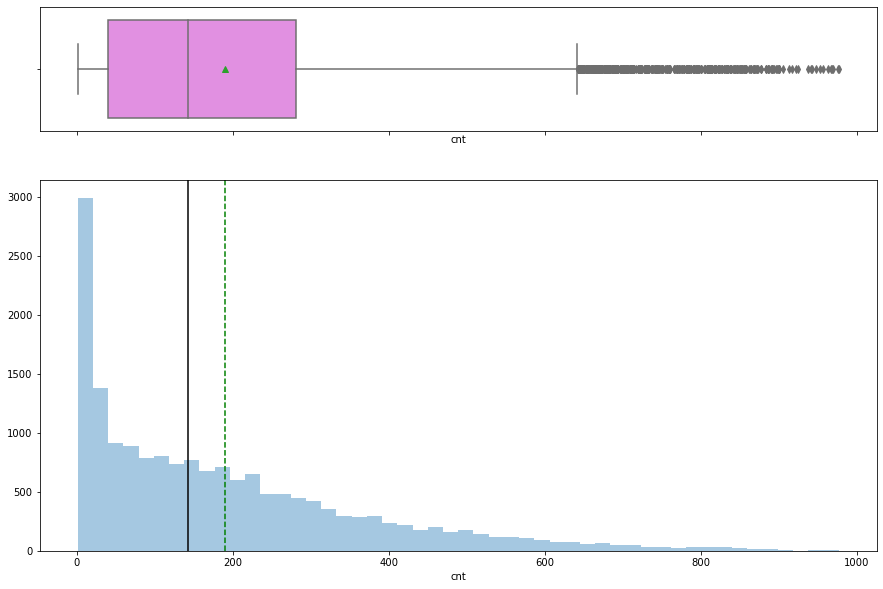

In [16]:
histogram_boxplot(data['cnt'])

In [17]:
#Top 5 highest values 
data['cnt'].nlargest()

14773    977
14964    976
14748    970
14725    968
15084    967
Name: cnt, dtype: int64

- The target variable i.e. the count of bikes rented has a right skewed distribution
- The range of values is very large with many observations being less than 10 count and some being greater than 900 count
- As evident from the boxplot, there are many outliers

**Function to create barplots that indicate percentage for each category**

In [18]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

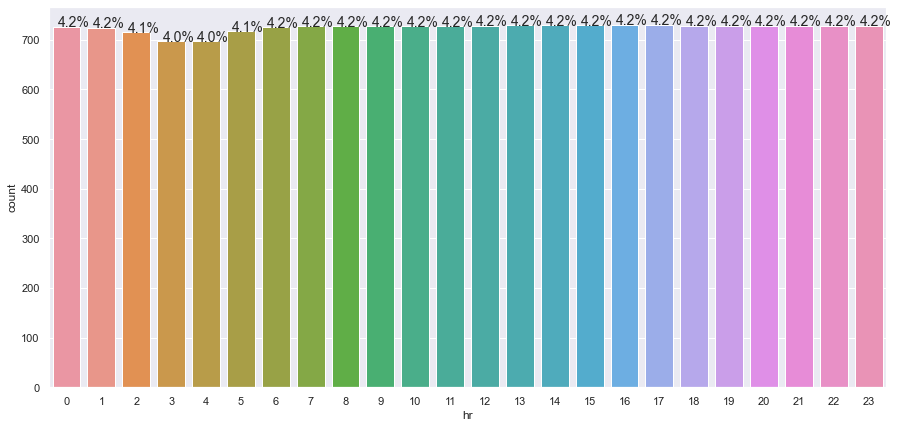

In [19]:
perc_on_bar(data['hr'])

- Each hour i.e. 0 to 23 has approx 4% observations in the data

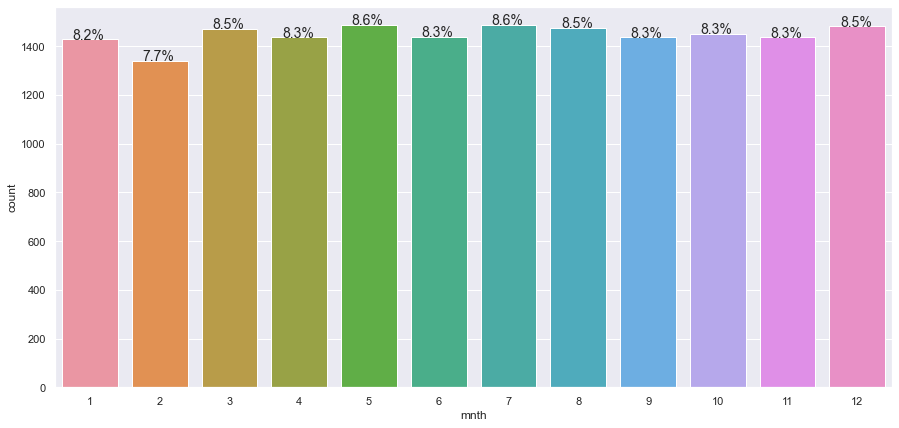

In [20]:
perc_on_bar(data['mnth'])

- Each month i.e. 1 to 12 has approx 8.5% observations in the data
- Month 2 has slightly less number of observations compared to other months

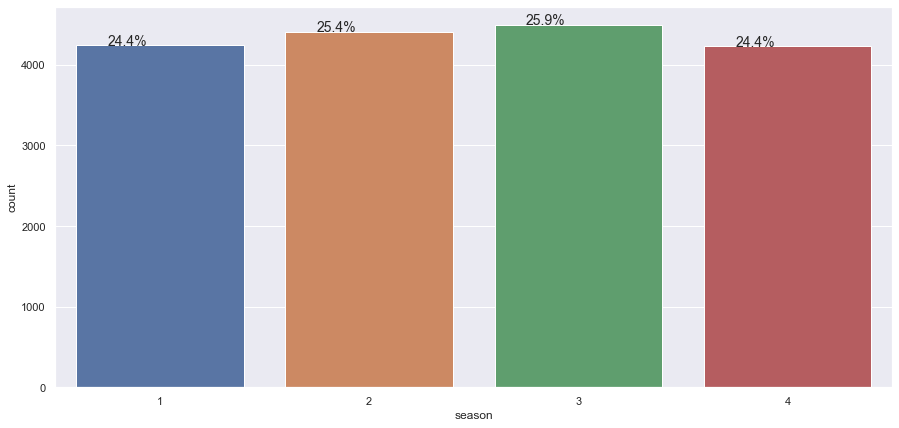

In [21]:
perc_on_bar(data['season'])

- Each season has approx 24% observations in the data

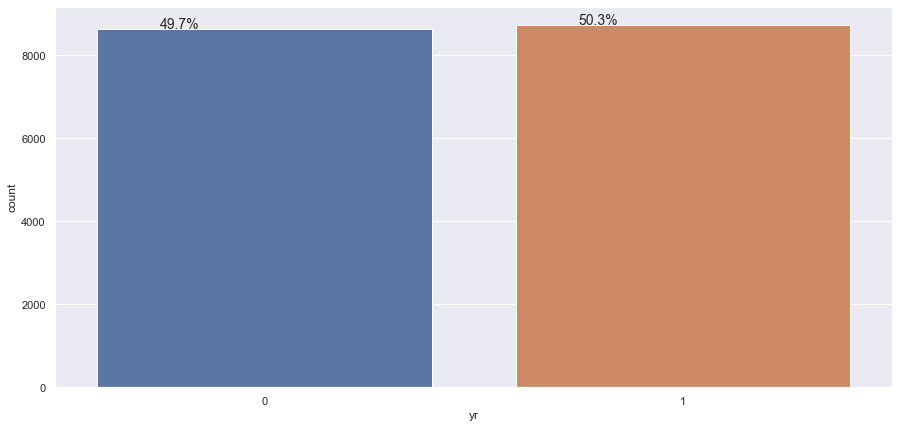

In [22]:
perc_on_bar(data['yr'])

- Both years have approx equal number of observations in the data

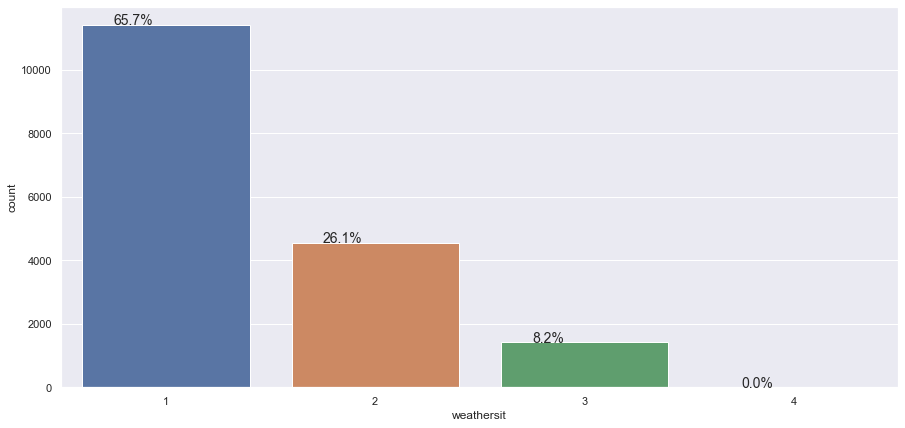

In [23]:
perc_on_bar(data['weathersit'])

- Season 1 has highest percentage of observations i.e. 65.7%
- Season 2 and season 3 have 26.1% and 8.2% observations respectively
- We saw earlier that season 4 has only 3 observations in the data. Here, it shows 0% observations due to rounding off.

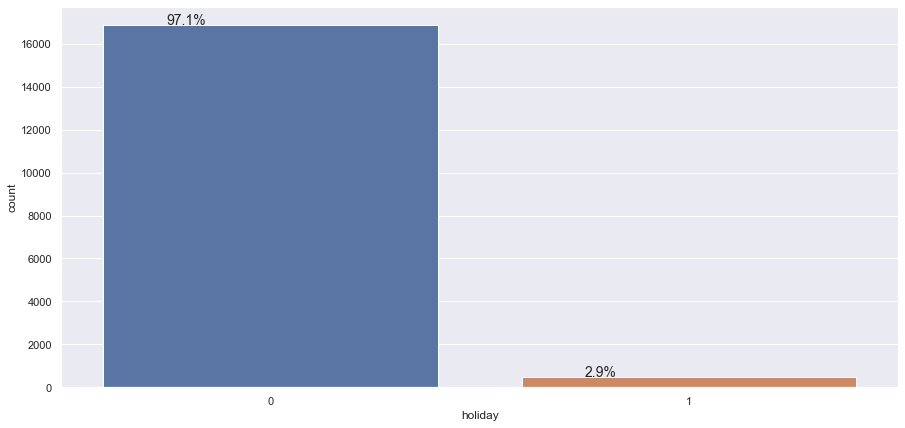

In [24]:
perc_on_bar(data['holiday'])

- As expected the percentage for non holidays is much more than holidays.
- There are 97% non holidays observations and only 3% for holidays

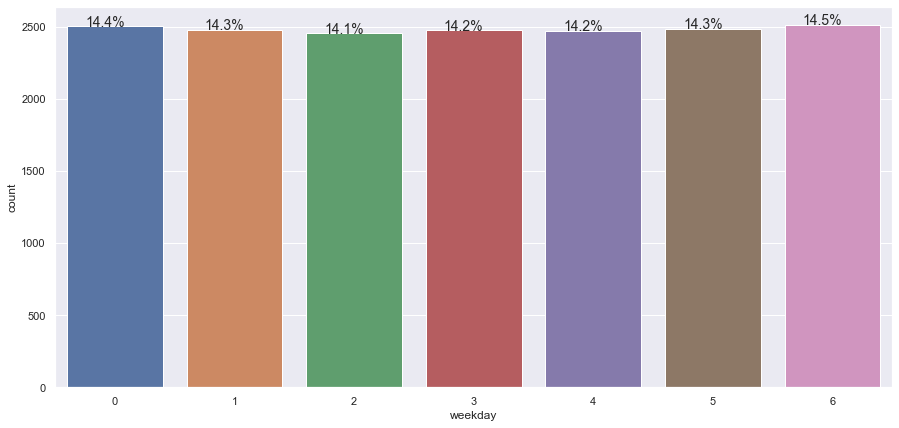

In [25]:
perc_on_bar(data['weekday'])

- Each weekday i.e. 0 to 6 has approx 14% observations in the data.

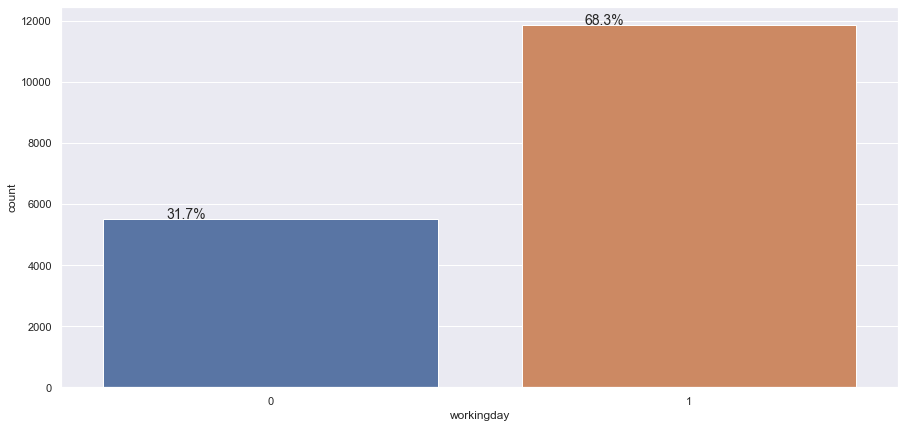

In [26]:
perc_on_bar(data['workingday'])

- As expected, number of observations for working days is higher than the number of observations for non working days.
- There are approx 68% observations for working days and 32% observations for non working days.

### Bivariate analysis

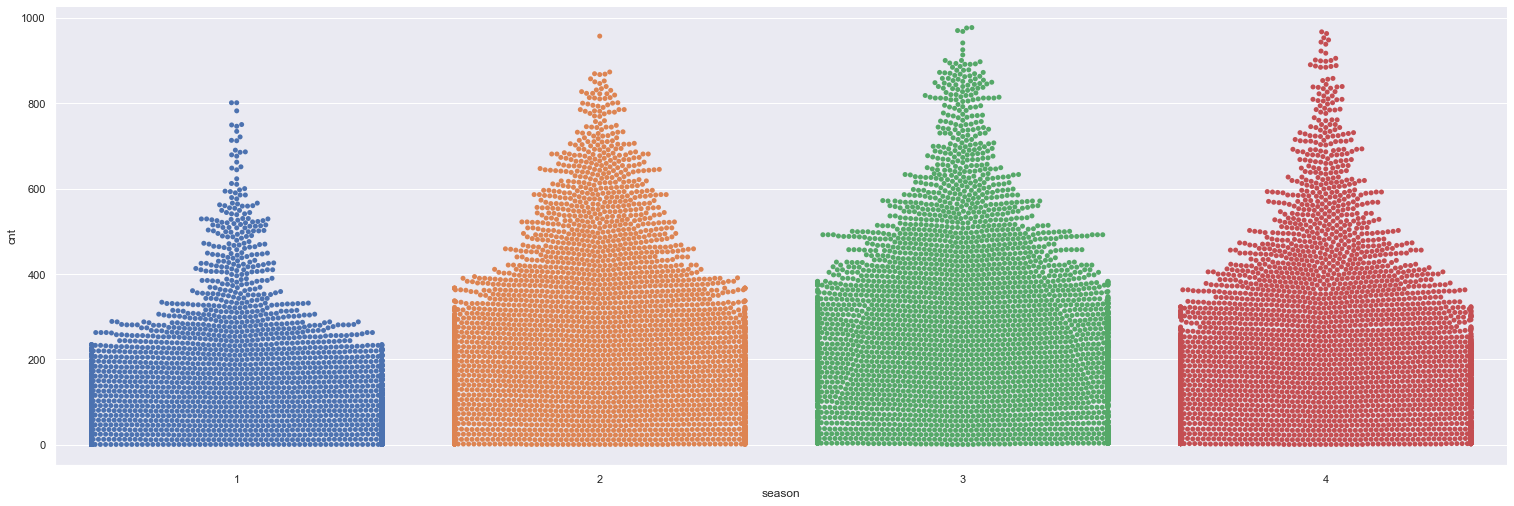

In [27]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="season", y="cnt", kind="swarm", data=data, height=7, aspect=3);

- The lowest number of bikes are rented in first season
- Highest number of bikes are shared in 3rd season
- This can be due to the relatively high temperature in season 1 i.e. spring as compared to the season 3 i.e. fall

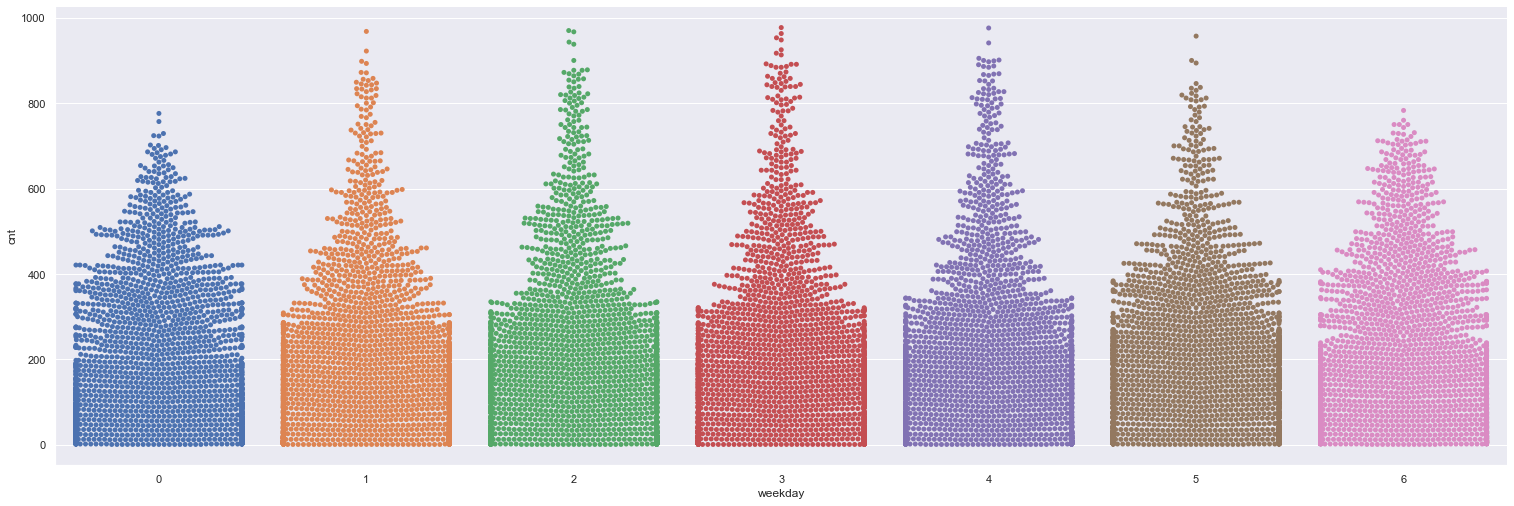

In [27]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="weekday", y="cnt", kind="swarm", data=data, height=7, aspect=3);

- Weekends i.e. weekday=0 and weekday=6 have low count of bikes rented and it is less varying.
- Working days have higher count of bikes rented and have more variation in the count and there are some outliers for days from 1 to 5.
- This can be due to closed schools/offices on weekends.

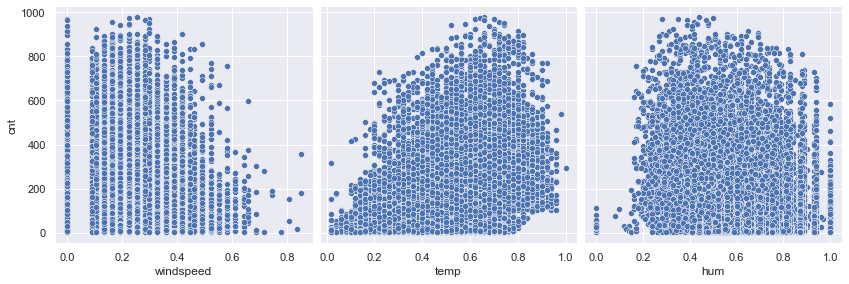

In [28]:
sns.pairplot(
    data,
    x_vars=["windspeed", "temp", "hum"],
    y_vars=["cnt"],
    height=4,
    aspect=1
    );
# Height (in inches) of each facet.
# Aspect * height gives the width (in inches) of each facet.

- We can see that count of bikes rented is low when temperature is very low or very high. Same is true for humidity.
- Count of bikes rented is high when wind speed is low.

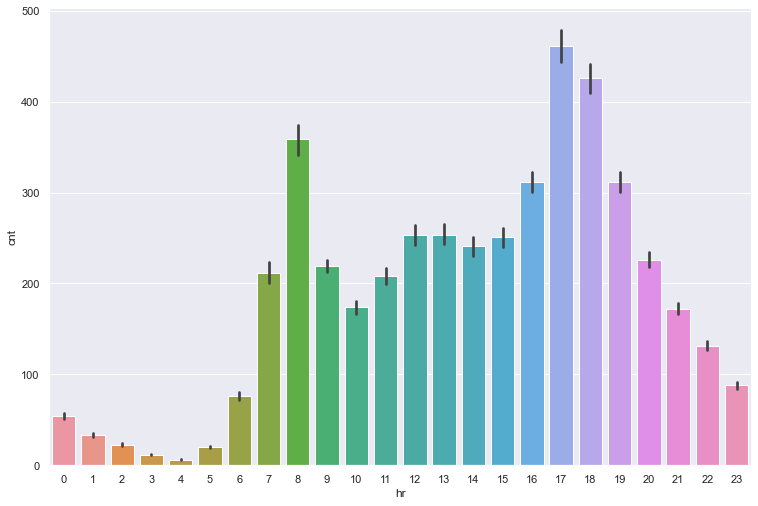

In [31]:
sns.catplot(x="hr", y="cnt", data=data, kind='bar', height=7, aspect=1.5, estimator=np.mean);
# estimator: Statistical function to estimate within each categorical bin.

- We can see average number of bikes rented is high at 8 AM and 5-6 PM, this can be due to office/school/college timings.
- Average number of bikes rented is very low for night time i.e. 12 AM to 5 AM.

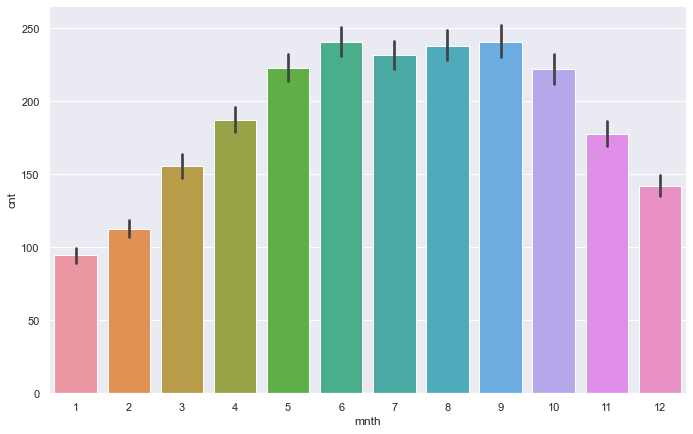

In [30]:
sns.catplot(x="mnth", y="cnt", data=data, kind='bar', height=6, aspect=1.6, estimator=np.mean);

- Average number of bikes rented is low for months - December, January, February. This can be due to the cold weather in these months.
- Average number of bikes rented is consistently high for months from May to October.

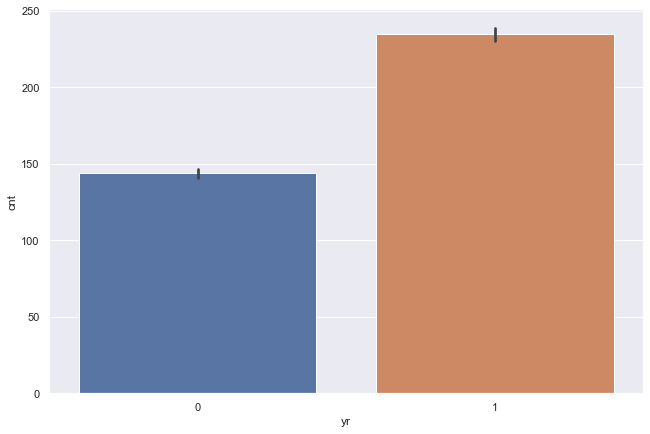

In [31]:
sns.catplot(x="yr", y="cnt", data=data, kind='bar', size=6, aspect=1.5, estimator=np.mean);

- Average count of bikes rented is high for year 2012 as compared to 2011.
- Let's check this for each season of both years and observe if count in each season has increased or in just 1 or 2 seasons. 

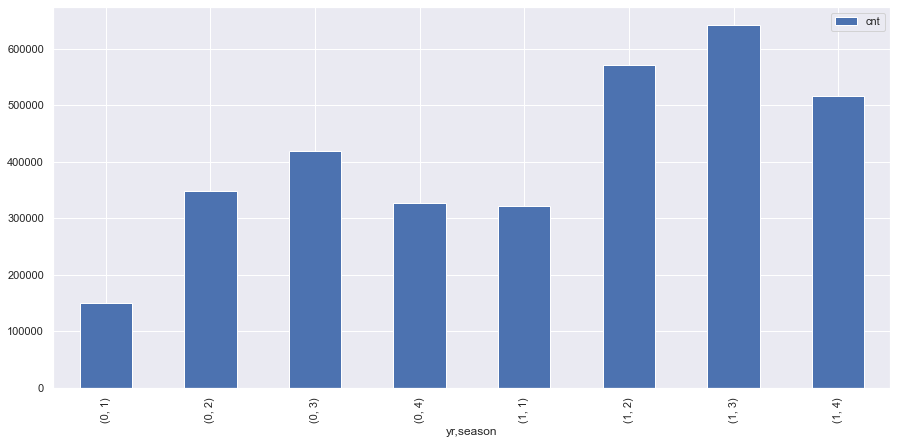

In [32]:
sns.set(rc={'figure.figsize':(15,7)})
pd.pivot_table(data=data, index=['yr', 'season'], values='cnt', aggfunc=np.sum).plot(kind='bar');

- We can see that number of bikes rented is higher in year 2012 for each season as compared to seasons in 2011.
- This shows that bike sharing is becoming more popular with time.

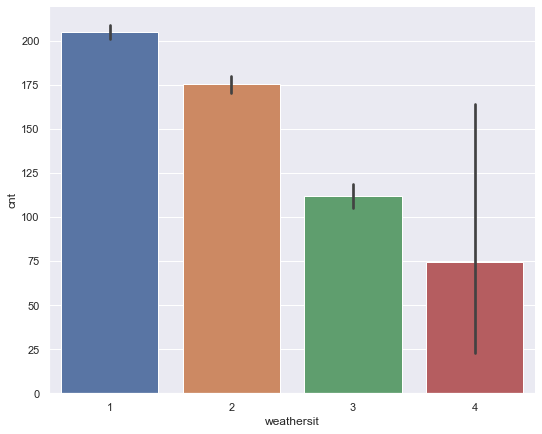

In [33]:
sns.catplot(x="weathersit", y='cnt', kind='bar', data=data, size=6, aspect=1.25, estimator=np.mean);

- As expected, average count of bikes rented is much higher on clear or partly cloudy days compared to snowy or rainy days.
- This implies that the average count of bikes rented is hugely affected by the weather.

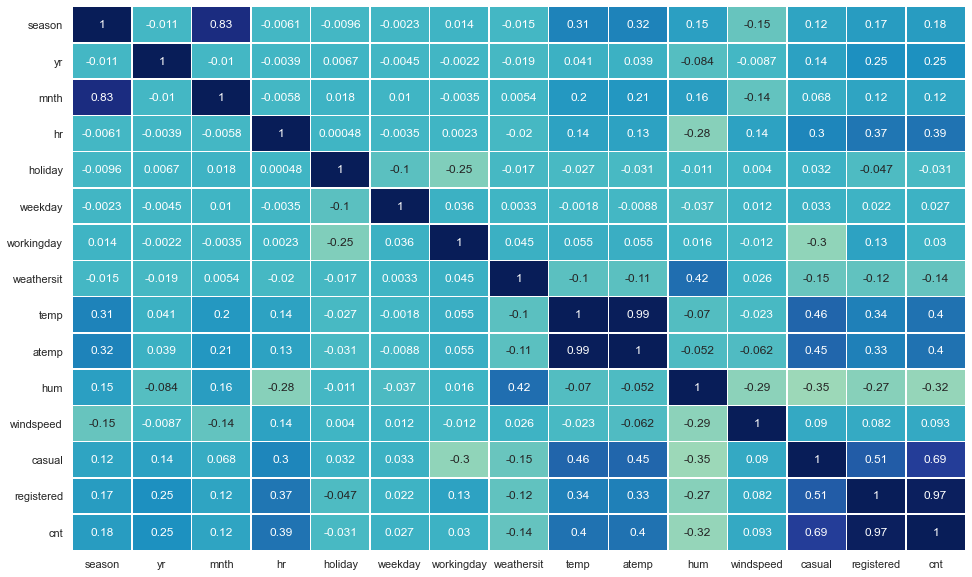

In [34]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

- We can see that temperature and feel like temperature are almost perfectly correlated
- Month and season have high positive correlation among them
- As count is addition of two columns - Casual and registered. We can drop these two columns because if we have casual and registered count then making a model won't make sense as we can simply add them. We would not have these 2 column while predicting new observations

In [35]:
#Dropping columns - casual and registered
data.drop(columns=['casual','registered'], inplace=True)

## <a id = "link3"></a> Split the dataset

In [36]:
# Separating features and the target column
X = data.drop('cnt', axis=1)
y = data['cnt'] 

In [37]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [38]:
X_train.shape, X_test.shape

((12165, 12), (5214, 12))

- We have 12,165 observations in the train set and 5,214 observations in the test set.

## Building Models

In [ ]:
Encoding (Label Encoding, One hot encoding) (not required for tree based methods) 
Normalization / Standardization (not required for tree based methods) 
Imbalanced dataset (not for regression)
Finalize your metric of choice  (for classification)
Decide the splits - test/train or test/train/val. and percentage of splits

Create X and y
Splits - test and train

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use same codes repeatedly.

In [39]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

## <a id = "link4"></a>Decision Tree Model

In [40]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [41]:
dtree_score=get_model_score(dtree)

R-sqaure on training set :  0.9999939364265239
R-square on test set :  0.8922273749987013
RMSE on training set :  0.4424086819235673
RMSE on test set :  60.82783340261016


- Decision tree model with default parameters is overfitting the train data.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### Hyperparameter Tuning

**max_depth**: int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split**: int or float, default=2
The minimum number of samples required to split an internal node.
If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

**min_samples_leaf**: int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

**max_features**: int, float or {“auto”, “sqrt”, “log2”}, default=None
The number of features to consider when looking for the best split:
If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=n_features.
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
    
**max_leaf_nodes**: int, default=None
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

**min_impurity_decrease**: float, default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value. 

**min_impurity_split**: float, default=0
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [ ]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
    
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

In [43]:
dtree_tuned_score=get_model_score(dtree_tuned)

R-sqaure on training set :  0.9588561760392927
R-square on test set :  0.9119854311073714
RMSE on training set :  36.44279225816553
RMSE on test set :  54.96995739195947


- The overfitting is reduced after hyperparameter tuning and test score has increased by approx 2%.
- RMSE is also reduced on test data and the model is generalizing better than the decision tree model with default parameters.

**Plotting the feature importance of each variable**

In [44]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.634942
temp        0.117441
yr          0.079271
workingday  0.063920
season      0.022164
atemp       0.019463
weathersit  0.019460
hum         0.017227
mnth        0.010498
weekday     0.010009
windspeed   0.003882
holiday     0.001724


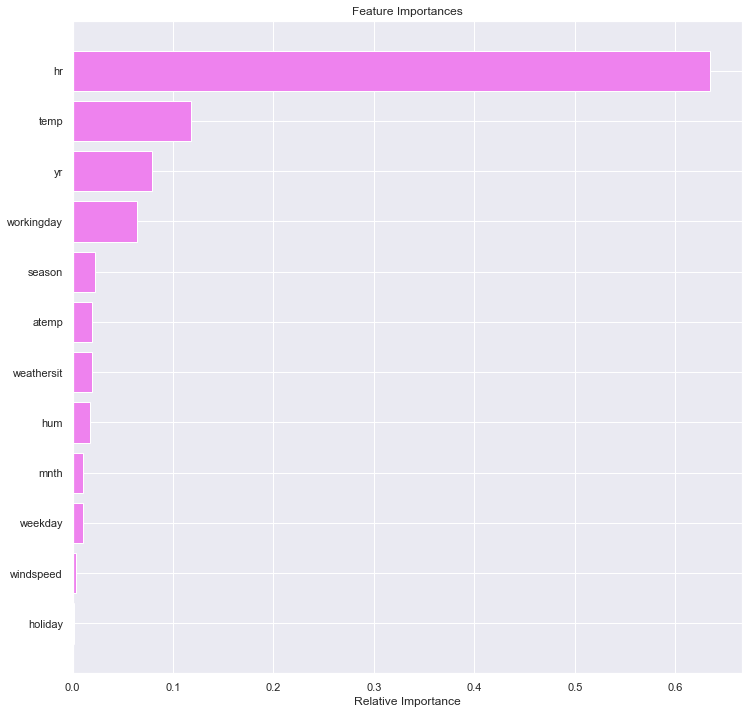

In [45]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- hr is the most important feature, in addition to temp and yr, for tuned decision tree model

## <a id = "link5"></a>Random Forest Model

In [46]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [47]:
rf_estimator_score=get_model_score(rf_estimator)

R-sqaure on training set :  0.9919022783128177
R-square on test set :  0.9421589674961293
RMSE on training set :  16.167420793032345
RMSE on test set :  44.56214995223083


- Random forest is giving good r2 score of 94% on the test data but it is slightly overfitting the train data.
- Let's try to reduce this overfitting by hyperparameter tuning.

### Hyperparameter Tuning

In [48]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120] # 120, 150, 200
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=120, random_state=1)

In [49]:
rf_tuned_score=get_model_score(rf_tuned)

R-sqaure on training set :  0.9919096176193417
R-square on test set :  0.9421110621417824
RMSE on training set :  16.16009252467567
RMSE on test set :  44.58059986277221


- No significant change in the result. The result is almost same before or after the hyperparameter tuning.

In [50]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.610116
temp        0.121773
yr          0.076295
workingday  0.059489
hum         0.026844
weathersit  0.020962
season      0.020876
atemp       0.020670
mnth        0.016153
weekday     0.013539
windspeed   0.010510
holiday     0.002774


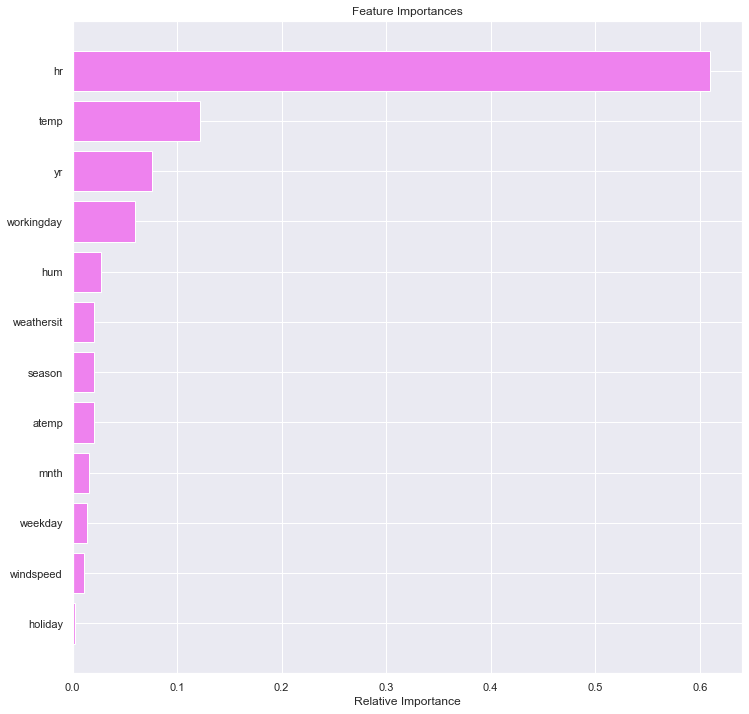

In [51]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- hr is the most important feature, in addition to temp and yr, for the tuned random forest model.

## <a id = "link6"></a>Boosting Models

### AdaBoost Regressor

In [52]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [53]:
ab_regressor_score=get_model_score(ab_regressor)

R-sqaure on training set :  0.6620671450557589
R-square on test set :  0.6763209472188219
RMSE on training set :  104.44184314767001
RMSE on test set :  105.41572853656164


- AdaBoost is generalizing well but it is giving poor performance, in terms of r2 score as well as RMSE, as compared to decision tree and random forest model.  

### Hyperparameter Tuning

In [54]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=30, random_state=1)

In [55]:
ab_tuned_score=get_model_score(ab_tuned)

R-sqaure on training set :  0.669247006578227
R-square on test set :  0.6823432190426465
RMSE on training set :  103.32637908778995
RMSE on test set :  104.43045797379186


- We can see that there is no significant improvement in the model after hyperparameter tuning.

In [56]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.523674
yr          0.135837
atemp       0.076841
workingday  0.058274
season      0.049087
weathersit  0.047040
hum         0.046359
mnth        0.036370
temp        0.026518
holiday     0.000000
weekday     0.000000
windspeed   0.000000


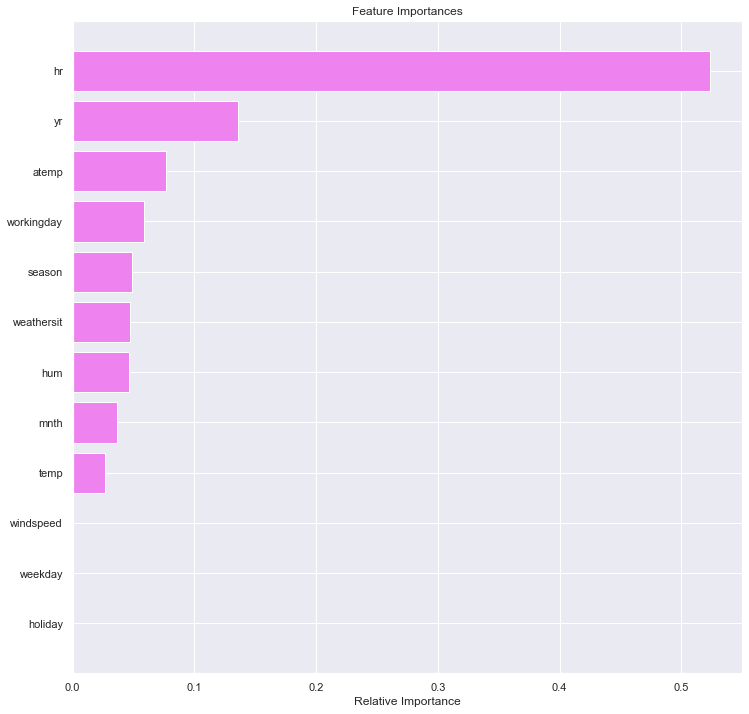

In [57]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- hr is the most important feature here, followed by yr and atemp.

### Gradient Boosting Regressor

In [58]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [59]:
gb_estimator_score=get_model_score(gb_estimator)

R-sqaure on training set :  0.8399586813152043
R-square on test set :  0.8397497482833491
RMSE on training set :  71.8745898418818
RMSE on test set :  74.17327883963448


- Gradient boosting is generalizing well and giving decent results but not as good as random forest.

### Hyperparameter Tuning

In [60]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, max_features=0.9, n_estimators=175,
                          random_state=1, subsample=0.7)

In [61]:
gb_tuned_score=get_model_score(gb_tuned)

R-sqaure on training set :  0.9846321402838036
R-square on test set :  0.955523582334073
RMSE on training set :  22.272348450912293
RMSE on test set :  39.07626239961316


- We can see that the model has improved significantly in terms of r2 score and RMSE.
- The r2 score has increase by approx 12% on the test data.
- RMSE has decreased by more than 30 for the test data.

In [62]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.577712
temp        0.099255
workingday  0.083006
yr          0.081833
atemp       0.046505
hum         0.024214
season      0.024071
weathersit  0.020767
weekday     0.018315
mnth        0.013716
windspeed   0.007647
holiday     0.002959


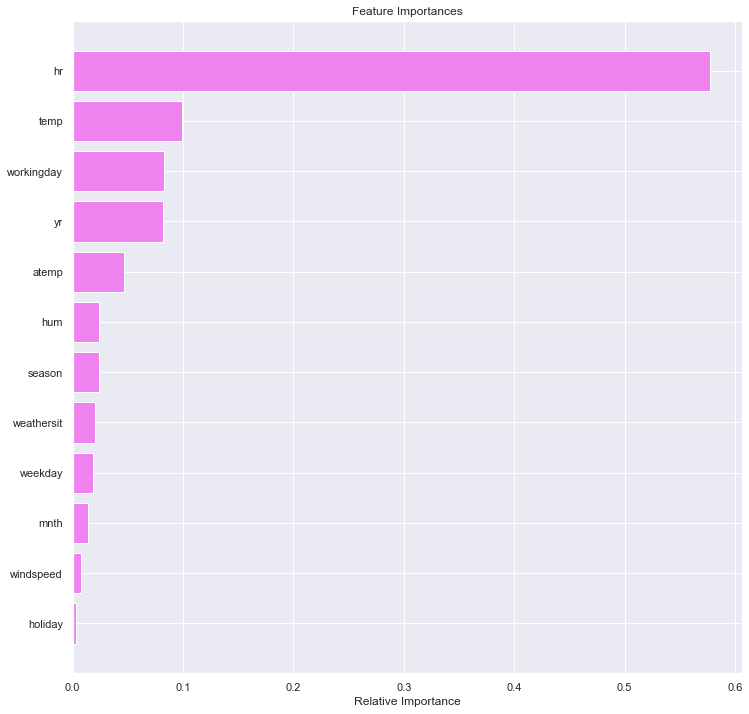

In [63]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- hr is the most important feature
- temp, yr and workingday have almost equal importance 

### XGBoost Regressor

In [64]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
xgb_estimator_score=get_model_score(xgb_estimator)

R-sqaure on training set :  0.9770545659840474
R-square on test set :  0.9501815993660051
RMSE on training set :  27.21494476474992
RMSE on test set :  41.35642671592279


- XGBoost with default parameters is giving almost as good results as tuned gradient boosting model.

### Hyperparameter Tuning

subsample [default=1], range: (0,1]
Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.

gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

colsample_bytree: is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

colsample_bylevel: is the subsample ratio of columns for each level. Subsampling occurs once for every new depth level reached in a tree. Columns are subsampled from the set of columns chosen for the current tree.

colsample_bynode: is the subsample ratio of columns for each node (split). Subsampling occurs once every time a new split is evaluated. Columns are subsampled from the set of columns chosen for the current level.


In [66]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
xgb_tuned_score=get_model_score(xgb_tuned)

R-sqaure on training set :  0.9818594937645477
R-square on test set :  0.9516586260022888
RMSE on training set :  24.19825338617285
RMSE on test set :  40.73874184671366


In [68]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
workingday  0.289411
hr          0.252782
yr          0.180462
temp        0.082915
season      0.054046
weathersit  0.040526
atemp       0.035576
weekday     0.021362
holiday     0.014707
hum         0.012433
mnth        0.011668
windspeed   0.004111


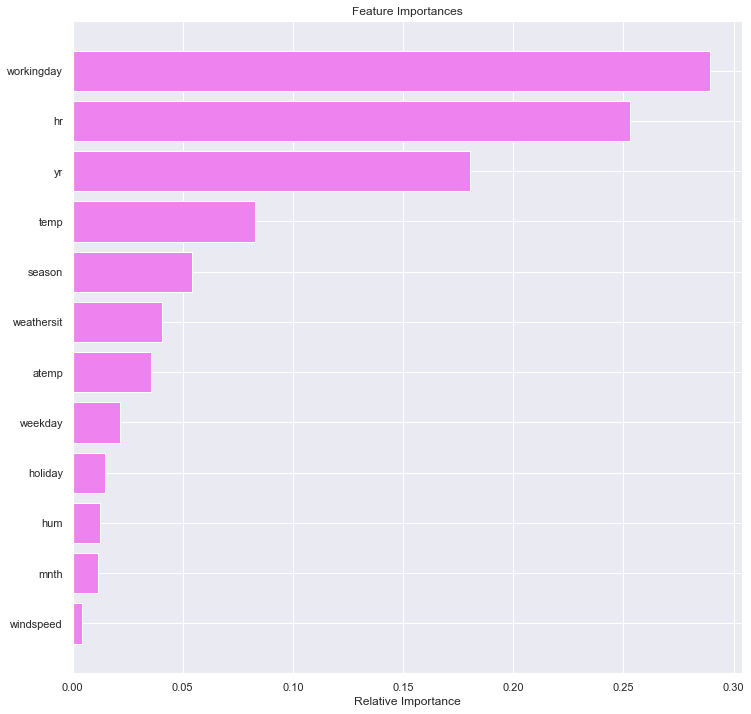

In [69]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In XGBoost, workingday is the most important feature followed by features - hr and yr

## <a id = "link7"></a>Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [70]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [71]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=14,
                                                     min_impurity_decrease=0.1,
                                                     min_samples_leaf=5,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_features=None,
                                                     n_estimators=120,
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=7,
                                                         max_features=0.9,
                                                         n_estimators=175,
                                                         random_state=1,
                              

In [72]:
stacking_estimator_score=get_model_score(stacking_estimator)

R-sqaure on training set :  0.9832203808048046
R-square on test set :  0.9500427976515735
RMSE on training set :  23.2728927992127
RMSE on test set :  41.413999320111806


## Comparing all models

In [73]:
# defining list of models
models = [dtree, dtree_tuned, rf_estimator, rf_tuned, ab_regressor, ab_tuned, gb_estimator, gb_tuned, xgb_estimator,
         xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [74]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost Regressor', 'Tuned AdaBoost Regressor',
                                          'Gradient Boosting Regressor', 'Tuned Gradient Boosting Regressor',
                                          'XGBoost Regressor',  'Tuned XGBoost Regressor','Stacking Regressor'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Decision Tree,0.999994,0.892227,0.442409,60.827833
1,Tuned Decision Tree,0.958856,0.911985,36.442792,54.969957
2,Random Forest,0.991902,0.942159,16.167421,44.562150
3,Tuned Random Forest,0.991910,0.942111,16.160093,44.580600
4,AdaBoost Regressor,0.662067,0.676321,104.441843,105.415729
5,Tuned AdaBoost Regressor,0.669247,0.682343,103.326379,104.430458
6,Gradient Boosting Regressor,0.839959,0.839750,71.874590,74.173279
7,Tuned Gradient Boosting Regressor,0.984632,0.955524,22.272348,39.076262
8,XGBoost Regressor,0.977055,0.950182,27.214945,41.356427
9,Tuned XGBoost Regressor,0.981859,0.951659,24.198253,40.738742


- Tuned gradient boosting model is the best model here. It has highest r2 score of approx 95.5% and lowest RMSE of approx 39 on the test data.
- Gradient boosting, xgboost and stacking regressor are the top 3 models. They are all giving similar performance.

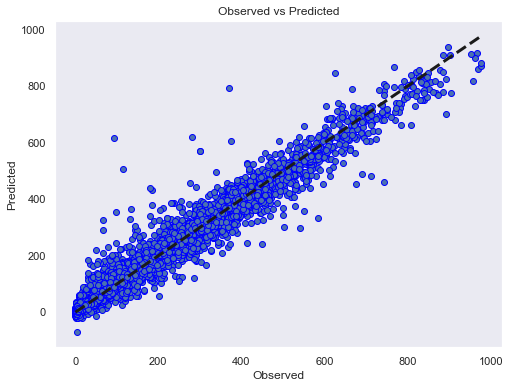

In [75]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

- We can see that points are dense on the line where predicted is equal to the observed.
- This implies that most of the predicted values are close to the true values with some exceptions as seen in the plot. 

## <a id = "link8"></a> Business Recommendations

- We can use this predictive model for any season and environmental parameters (which we know in advance) and can predict the count of the bikes to be rented. The ability to predict the number of hourly users can allow the entities (businesses/governments) that oversee these systems to manage them in a more efficient and cost-effective manner.
- More bikes can be made available for fall and winter seasons as the number of bikes rented is high in these seasons.
- As number of bikes rented is high for day timings compared to night timings, similarly, fall and winter seasons have more surge compared to other seasons. We can choose differential prices of bikes accordingly.
- As most of the rentals are for commuting to workplaces and colleges on a daily basis, company can launch more stations near busy workplaces or school/colleges to reach out to their main customers.
- Number of bikes rented is heavily dependent on the weather. So, we should adjust the number of available bikes in an area based on the weather forecast.
- Maintenance activities for bikes can be done at night due to low usage of bikes during the night time.
- Company can provide offers or coupons like monthly subscription to compensate the low count on holidays or weekends.